# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [4]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Read data into dataframe
act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [6]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [8]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [9]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


##### 3. Describe in words what each variable (column) is.

ACT Columns:
----------
Unnamed: 0       Key/Index?
State            State and Include National also
Participation    % of Participation 
English          Score in English test (1-36)
Math             Score in Math test    (1-36)
Reading          Score in Reading test (1-36)
Science          Score in Science test (1-36)
Composite        Average Score of 4 test scores (1-36)

SAT Columns:
----------
Unnamed: 0                           Key/Index?
State                                State 
Participation                        % of Participation 
Evidence-Based Reading and Writing   Score in Evidence-Based Reading and Writing (200-800)
Math                                 Score in Math test     (200-800)
Total                                Sum of two test scores (400-1600)


##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [10]:
act.isnull().sum()

Unnamed: 0       0
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [11]:
sat.isnull().sum()

Unnamed: 0                            0
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [12]:
act.max()

Unnamed: 0            51
State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object

In [13]:
act.min()

Unnamed: 0             0
State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

In [14]:
sat.max()

Unnamed: 0                                 50
State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object

In [15]:
sat.min()

Unnamed: 0                                  0
State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

In [16]:
sat[sat['Math']==52]

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,20,Maryland,69%,536,52,1060


- Data have no null values, 
- On SAT one observation on Math column, looks that one digit of the score is missing (should be 524 not 52 (1060-536). SAT Scale in Math should be ranging from 200 to 800.
- ACT has 1 more row (52) beacuse has National Info. SAT only 51 row, one for each State (National not included)

In [17]:
#Remove National row on ACT
act.drop([0], inplace=True)
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2
10,10,Florida,73%,19.0,19.4,21.0,19.4,19.8


In [18]:
act.reset_index(inplace = True,drop = True)
act.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
1,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
2,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
3,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
4,5,California,31%,22.5,22.7,23.1,22.2,22.8


In [19]:
#Update row value on SAT (sat[sat['Math']==52])
sat.loc[sat['State']== 'Maryland', 'Math'] = 524

In [20]:
sat[sat['State']== 'Maryland']

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,20,Maryland,69%,536,524,1060


##### 5. Print the types of each column.

In [21]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
Unnamed: 0       51 non-null int64
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [22]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [23]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [24]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [25]:
#Participation remove '%' and convert to float type

sat['Participation'] = sat['Participation'].replace('%','',regex=True).astype('float')
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5.0,593,572,1165
1,1,Alaska,38.0,547,533,1080
2,2,Arizona,30.0,563,553,1116
3,3,Arkansas,3.0,614,594,1208
4,4,California,53.0,531,524,1055
5,5,Colorado,11.0,606,595,1201
6,6,Connecticut,100.0,530,512,1041
7,7,Delaware,100.0,503,492,996
8,8,District of Columbia,100.0,482,468,950
9,9,Florida,83.0,520,497,1017


In [26]:
act['Participation'] = act['Participation'].replace('%','',regex=True).astype('float')
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,5,California,31.0,22.5,22.7,23.1,22.2,22.8
5,6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
6,7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
7,8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
8,9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
9,10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


In [27]:
act['Participation'].describe()

count     51.000000
mean      65.254902
std       32.140842
min        8.000000
25%       31.000000
50%       69.000000
75%      100.000000
max      100.000000
Name: Participation, dtype: float64

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [28]:
sat_dict_part = {sat.loc [idx, 'State']: [sat.loc[idx, 'Participation']] for idx in range (sat.shape[0])}
sat_dict_part

{'Alabama': [5.0],
 'Alaska': [38.0],
 'Arizona': [30.0],
 'Arkansas': [3.0],
 'California': [53.0],
 'Colorado': [11.0],
 'Connecticut': [100.0],
 'Delaware': [100.0],
 'District of Columbia': [100.0],
 'Florida': [83.0],
 'Georgia': [61.0],
 'Hawaii': [55.0],
 'Idaho': [93.0],
 'Illinois': [9.0],
 'Indiana': [63.0],
 'Iowa': [2.0],
 'Kansas': [4.0],
 'Kentucky': [4.0],
 'Louisiana': [4.0],
 'Maine': [95.0],
 'Maryland': [69.0],
 'Massachusetts': [76.0],
 'Michigan': [100.0],
 'Minnesota': [3.0],
 'Mississippi': [2.0],
 'Missouri': [3.0],
 'Montana': [10.0],
 'Nebraska': [3.0],
 'Nevada': [26.0],
 'New Hampshire': [96.0],
 'New Jersey': [70.0],
 'New Mexico': [11.0],
 'New York': [67.0],
 'North Carolina': [49.0],
 'North Dakota': [2.0],
 'Ohio': [12.0],
 'Oklahoma': [7.0],
 'Oregon': [43.0],
 'Pennsylvania': [65.0],
 'Rhode Island': [71.0],
 'South Carolina': [50.0],
 'South Dakota': [3.0],
 'Tennessee': [5.0],
 'Texas': [62.0],
 'Utah': [3.0],
 'Vermont': [60.0],
 'Virginia': [65.0]

In [29]:
sat_dict_ebrw = {sat.loc [idx, 'State']: [sat.loc[idx, 'Evidence-Based Reading and Writing']] for idx in range (sat.shape[0])}
sat_dict_ebrw

{'Alabama': [593],
 'Alaska': [547],
 'Arizona': [563],
 'Arkansas': [614],
 'California': [531],
 'Colorado': [606],
 'Connecticut': [530],
 'Delaware': [503],
 'District of Columbia': [482],
 'Florida': [520],
 'Georgia': [535],
 'Hawaii': [544],
 'Idaho': [513],
 'Illinois': [559],
 'Indiana': [542],
 'Iowa': [641],
 'Kansas': [632],
 'Kentucky': [631],
 'Louisiana': [611],
 'Maine': [513],
 'Maryland': [536],
 'Massachusetts': [555],
 'Michigan': [509],
 'Minnesota': [644],
 'Mississippi': [634],
 'Missouri': [640],
 'Montana': [605],
 'Nebraska': [629],
 'Nevada': [563],
 'New Hampshire': [532],
 'New Jersey': [530],
 'New Mexico': [577],
 'New York': [528],
 'North Carolina': [546],
 'North Dakota': [635],
 'Ohio': [578],
 'Oklahoma': [530],
 'Oregon': [560],
 'Pennsylvania': [540],
 'Rhode Island': [539],
 'South Carolina': [543],
 'South Dakota': [612],
 'Tennessee': [623],
 'Texas': [513],
 'Utah': [624],
 'Vermont': [562],
 'Virginia': [561],
 'Washington': [541],
 'West Virg

In [30]:
sat_dict_math = {sat.loc [idx, 'State']: [sat.loc[idx, 'Math']] for idx in range (sat.shape[0])}
sat_dict_tot = {sat.loc [idx, 'State']: [sat.loc[idx, 'Total']] for idx in range (sat.shape[0])}

In [31]:
act_dict_part = {act.loc [idx, 'State']: [act.loc[idx, 'Participation']] for idx in range (act.shape[0])}
act_dict_eng = {act.loc [idx, 'State']: [act.loc[idx, 'English']] for idx in range (act.shape[0])}
act_dict_math = {act.loc [idx, 'State']: [act.loc[idx, 'Math']] for idx in range (act.shape[0])}
act_dict_read = {act.loc [idx, 'State']: [act.loc[idx, 'Reading']] for idx in range (act.shape[0])}
act_dict_sci = {act.loc [idx, 'State']: [act.loc[idx, 'Science']] for idx in range (act.shape[0])}
act_dict_com = {act.loc [idx, 'State']: [act.loc[idx, 'Composite']] for idx in range (act.shape[0])}

In [32]:
act_dict_com

{'Alabama': [19.199999999999999],
 'Alaska': [19.800000000000001],
 'Arizona': [19.699999999999999],
 'Arkansas': [19.399999999999999],
 'California': [22.800000000000001],
 'Colorado': [20.800000000000001],
 'Connecticut': [25.199999999999999],
 'Delaware': [24.100000000000001],
 'District of Columbia': [24.199999999999999],
 'Florida': [19.800000000000001],
 'Georgia': [21.399999999999999],
 'Hawaii': [19.0],
 'Idaho': [22.300000000000001],
 'Illinois': [21.399999999999999],
 'Indiana': [22.600000000000001],
 'Iowa': [21.899999999999999],
 'Kansas': [21.699999999999999],
 'Kentucky': [20.0],
 'Louisiana': [19.5],
 'Maine': [24.300000000000001],
 'Maryland': [23.600000000000001],
 'Massachusetts': [25.399999999999999],
 'Michigan': [24.100000000000001],
 'Minnesota': [21.5],
 'Mississippi': [18.600000000000001],
 'Missouri': [20.399999999999999],
 'Montana': [20.300000000000001],
 'Nebraska': [21.399999999999999],
 'Nevada': [17.800000000000001],
 'New Hampshire': [25.5],
 'New Jersey

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [33]:
sat_dict = sat.to_dict('list')
act_dict = act.to_dict('list')

In [34]:
sat_dict

{'Evidence-Based Reading and Writing': [593,
  547,
  563,
  614,
  531,
  606,
  530,
  503,
  482,
  520,
  535,
  544,
  513,
  559,
  542,
  641,
  632,
  631,
  611,
  513,
  536,
  555,
  509,
  644,
  634,
  640,
  605,
  629,
  563,
  532,
  530,
  577,
  528,
  546,
  635,
  578,
  530,
  560,
  540,
  539,
  543,
  612,
  623,
  513,
  624,
  562,
  561,
  541,
  558,
  642,
  626],
 'Math': [572,
  533,
  553,
  594,
  524,
  595,
  512,
  492,
  468,
  497,
  515,
  541,
  493,
  556,
  532,
  635,
  628,
  616,
  586,
  499,
  524,
  551,
  495,
  651,
  607,
  631,
  591,
  625,
  553,
  520,
  526,
  561,
  523,
  535,
  621,
  570,
  517,
  548,
  531,
  524,
  521,
  603,
  604,
  507,
  614,
  551,
  541,
  534,
  528,
  649,
  604],
 'Participation': [5.0,
  38.0,
  30.0,
  3.0,
  53.0,
  11.0,
  100.0,
  100.0,
  100.0,
  83.0,
  61.0,
  55.0,
  93.0,
  9.0,
  63.0,
  2.0,
  4.0,
  4.0,
  4.0,
  95.0,
  69.0,
  76.0,
  100.0,
  3.0,
  2.0,
  3.0,
  10.0,
  3.0,
  26

In [35]:
act_dict

{'Composite': [19.2,
  19.8,
  19.7,
  19.4,
  22.8,
  20.8,
  25.2,
  24.1,
  24.2,
  19.8,
  21.4,
  19.0,
  22.3,
  21.4,
  22.6,
  21.9,
  21.7,
  20.0,
  19.5,
  24.3,
  23.6,
  25.4,
  24.1,
  21.5,
  18.6,
  20.4,
  20.3,
  21.4,
  17.8,
  25.5,
  23.9,
  19.7,
  24.2,
  19.1,
  20.3,
  22.0,
  19.4,
  21.8,
  23.7,
  24.0,
  18.7,
  21.8,
  19.8,
  20.7,
  20.3,
  23.6,
  23.8,
  21.9,
  20.4,
  20.5,
  20.2],
 'English': [18.9,
  18.7,
  18.6,
  18.9,
  22.5,
  20.1,
  25.5,
  24.1,
  24.4,
  19.0,
  21.0,
  17.8,
  21.9,
  21.0,
  22.0,
  21.2,
  21.1,
  19.6,
  19.4,
  24.2,
  23.3,
  25.4,
  24.1,
  20.4,
  18.2,
  19.8,
  19.0,
  20.9,
  16.3,
  25.4,
  23.8,
  18.6,
  23.8,
  17.8,
  19.0,
  21.2,
  18.5,
  21.2,
  23.4,
  24.0,
  17.5,
  20.7,
  19.5,
  19.5,
  19.5,
  23.3,
  23.5,
  20.9,
  20.0,
  19.7,
  19.4],
 'Math': [18.4,
  19.8,
  19.8,
  19.0,
  22.7,
  20.3,
  24.6,
  23.4,
  23.5,
  19.4,
  20.9,
  19.2,
  21.8,
  21.2,
  22.4,
  21.3,
  21.3,
  19.4,
  18.8

##### 9. Merge the dataframes on the state column.

In [36]:
act_sat = pd.merge(act, sat, on = 'State')
act_sat

,Unnamed: 0_x,State,Participation_x,English,Math_x,Reading,Science,Composite,Unnamed: 0_y,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,0,5.0,593,572,1165
1,2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,1,38.0,547,533,1080
2,3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,2,30.0,563,553,1116
3,4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3,3.0,614,594,1208
4,5,California,31.0,22.5,22.7,23.1,22.2,22.8,4,53.0,531,524,1055
5,6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,5,11.0,606,595,1201
6,7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,6,100.0,530,512,1041
7,8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,7,100.0,503,492,996
8,9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,8,100.0,482,468,950
9,10,Florida,73.0,19.0,19.4,21.0,19.4,19.8,9,83.0,520,497,1017


In [37]:
#Drop unnecesary columns
act_sat.drop(['Unnamed: 0_x'], axis = 1, inplace=True)

In [38]:
act_sat.drop(['Unnamed: 0_y'], axis = 1, inplace=True)

In [39]:
act_sat

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [40]:
act_sat.rename(columns={'Participation_x': 'Participation_act', 'Math_x': 'Math_act', 'Participation_y': 'Participation_sat', 'Math_y': 'Math_sat'}, inplace=True)
act_sat

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [41]:
act_sat.max(numeric_only=True)

Participation_act                      100.0
English                                 25.5
Math_act                                25.3
Reading                                 26.0
Science                                 24.9
Composite                               25.5
Participation_sat                      100.0
Evidence-Based Reading and Writing     644.0
Math_sat                               651.0
Total                                 1295.0
dtype: float64

In [42]:
act_sat.min(numeric_only=True)

Participation_act                       8.0
English                                16.3
Math_act                               18.0
Reading                                18.1
Science                                 2.3
Composite                              17.8
Participation_sat                       2.0
Evidence-Based Reading and Writing    482.0
Math_sat                              468.0
Total                                 950.0
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [43]:
def stdev (df):
    return (df.std(numeric_only=True)).tolist()
sd = stdev (act_sat)
sd

[32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 47.12139516560329,
 92.49481172519046]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [44]:
#Insert " " on "State" column
sd.insert(0,'')
sd

['',
 32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 47.12139516560329,
 92.49481172519046]

In [45]:
act_sat

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017


In [46]:
cols = list(act_sat.columns)
cols

['State',
 'Participation_act',
 'English',
 'Math_act',
 'Reading',
 'Science',
 'Composite',
 'Participation_sat',
 'Evidence-Based Reading and Writing',
 'Math_sat',
 'Total']

In [47]:
new_df_row = pd.DataFrame ([sd])
new_df_row

,0,1,2,3,4,5,6,7,8,9,10
0,,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,47.121395,92.494812


In [48]:
#Add header/columns names to the new row of std
new_df_row.columns = cols
new_df_row

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,47.121395,92.494812


In [49]:
#Now add the row to the df
new_act_sat = act_sat.append(new_df_row)
new_act_sat

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,Alabama,100.000000,18.900000,18.400000,19.700000,19.400000,19.200000,5.000000,593.000000,572.000000,1165.000000
1,Alaska,65.000000,18.700000,19.800000,20.400000,19.900000,19.800000,38.000000,547.000000,533.000000,1080.000000
2,Arizona,62.000000,18.600000,19.800000,20.100000,19.800000,19.700000,30.000000,563.000000,553.000000,1116.000000
3,Arkansas,100.000000,18.900000,19.000000,19.700000,19.500000,19.400000,3.000000,614.000000,594.000000,1208.000000
4,California,31.000000,22.500000,22.700000,23.100000,22.200000,22.800000,53.000000,531.000000,524.000000,1055.000000
5,Colorado,100.000000,20.100000,20.300000,21.200000,20.900000,20.800000,11.000000,606.000000,595.000000,1201.000000
6,Connecticut,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000,100.000000,530.000000,512.000000,1041.000000
7,Delaware,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000,100.000000,503.000000,492.000000,996.000000
8,District of Columbia,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000,100.000000,482.000000,468.000000,950.000000
9,Florida,73.000000,19.000000,19.400000,21.000000,19.400000,19.800000,83.000000,520.000000,497.000000,1017.000000


In [50]:
#another way to do it:
frames = [act_sat, new_df_row]
new_act_sat = pd.concat(frames)
new_act_sat

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,Alabama,100.000000,18.900000,18.400000,19.700000,19.400000,19.200000,5.000000,593.000000,572.000000,1165.000000
1,Alaska,65.000000,18.700000,19.800000,20.400000,19.900000,19.800000,38.000000,547.000000,533.000000,1080.000000
2,Arizona,62.000000,18.600000,19.800000,20.100000,19.800000,19.700000,30.000000,563.000000,553.000000,1116.000000
3,Arkansas,100.000000,18.900000,19.000000,19.700000,19.500000,19.400000,3.000000,614.000000,594.000000,1208.000000
4,California,31.000000,22.500000,22.700000,23.100000,22.200000,22.800000,53.000000,531.000000,524.000000,1055.000000
5,Colorado,100.000000,20.100000,20.300000,21.200000,20.900000,20.800000,11.000000,606.000000,595.000000,1201.000000
6,Connecticut,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000,100.000000,530.000000,512.000000,1041.000000
7,Delaware,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000,100.000000,503.000000,492.000000,996.000000
8,District of Columbia,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000,100.000000,482.000000,468.000000,950.000000
9,Florida,73.000000,19.000000,19.400000,21.000000,19.400000,19.800000,83.000000,520.000000,497.000000,1017.000000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [51]:
new_act_sat.sort_values(['Participation_sat'], ascending=False)

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
22,Michigan,29.000000,24.100000,23.700000,24.500000,23.800000,24.100000,100.000000,509.000000,495.000000,1005.000000
6,Connecticut,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000,100.000000,530.000000,512.000000,1041.000000
7,Delaware,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000,100.000000,503.000000,492.000000,996.000000
8,District of Columbia,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000,100.000000,482.000000,468.000000,950.000000
29,New Hampshire,18.000000,25.400000,25.100000,26.000000,24.900000,25.500000,96.000000,532.000000,520.000000,1052.000000
19,Maine,8.000000,24.200000,24.000000,24.800000,23.700000,24.300000,95.000000,513.000000,499.000000,1012.000000
12,Idaho,38.000000,21.900000,21.800000,23.000000,22.100000,22.300000,93.000000,513.000000,493.000000,1005.000000
9,Florida,73.000000,19.000000,19.400000,21.000000,19.400000,19.800000,83.000000,520.000000,497.000000,1017.000000
21,Massachusetts,29.000000,25.400000,25.300000,25.900000,24.700000,25.400000,76.000000,555.000000,551.000000,1107.000000
39,Rhode Island,21.000000,24.000000,23.300000,24.700000,23.400000,24.000000,71.000000,539.000000,524.000000,1062.000000


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [52]:
new_act_sat[new_act_sat['Participation_sat'] > 50].sort_values(['Participation_sat'], ascending=False)

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509.0,495.0,1005.0
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
12,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513.0,493.0,1005.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0
21,Massachusetts,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
#Cleanning before plot. Drop columns that I dont want to plot
act_clean = act.drop(['Unnamed: 0'], axis = 1)
act_clean = act_clean.drop(['Composite'], axis = 1)
act_clean = act_clean.drop(['Participation'], axis = 1)
act_clean

,State,English,Math,Reading,Science
0,Alabama,18.9,18.4,19.7,19.4
1,Alaska,18.7,19.8,20.4,19.9
2,Arizona,18.6,19.8,20.1,19.8
3,Arkansas,18.9,19.0,19.7,19.5
4,California,22.5,22.7,23.1,22.2
5,Colorado,20.1,20.3,21.2,20.9
6,Connecticut,25.5,24.6,25.6,24.6
7,Delaware,24.1,23.4,24.8,23.6
8,District of Columbia,24.4,23.5,24.9,23.5
9,Florida,19.0,19.4,21.0,19.4


In [55]:
sat_clean = sat.drop(['Unnamed: 0'], axis = 1)
sat_clean = sat_clean.drop(['Total'], axis = 1)
sat_clean = sat_clean.drop(['Participation'], axis = 1)
sat_clean

,State,Evidence-Based Reading and Writing,Math
0,Alabama,593,572
1,Alaska,547,533
2,Arizona,563,553
3,Arkansas,614,594
4,California,531,524
5,Colorado,606,595
6,Connecticut,530,512
7,Delaware,503,492
8,District of Columbia,482,468
9,Florida,520,497


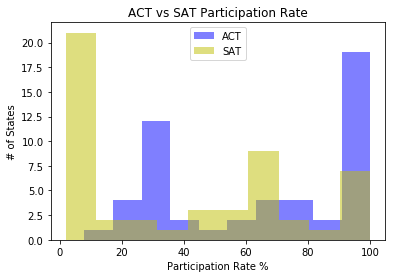

In [60]:
plt.title('ACT vs SAT Participation Rate')
plt.hist(act['Participation'], bins = 10, alpha=0.5, color = 'b');
plt.hist(sat['Participation'], bins = 10, alpha=0.5, color = 'y');
labels= ["ACT","SAT"]
plt.ylabel ('# of States')
plt.xlabel ('Participation Rate %')
plt.legend(labels)
plt.show()

##### 17. Plot the Math(s) distributions from both data sets.

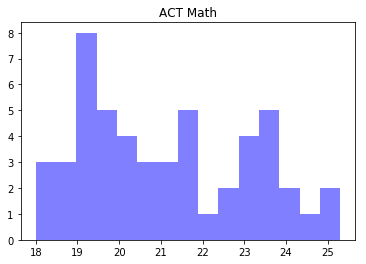

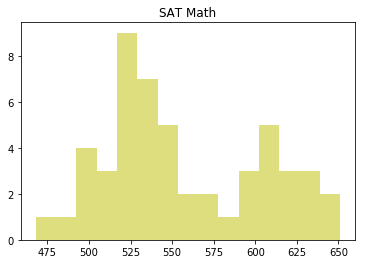

In [61]:
plt.title('ACT Math')
plt.hist(act_clean['Math'], bins = 15, alpha = 0.5, color = 'b' );
plt.show()
plt.title('SAT Math')
plt.hist(sat_clean['Math'] , bins = 15, alpha = 0.5, color = 'y');
plt.show()

##### 18. Plot the Verbal distributions from both data sets.

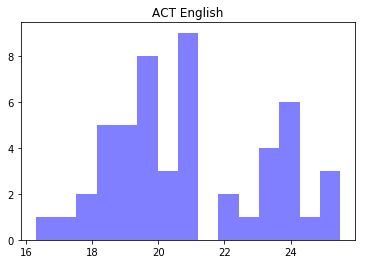

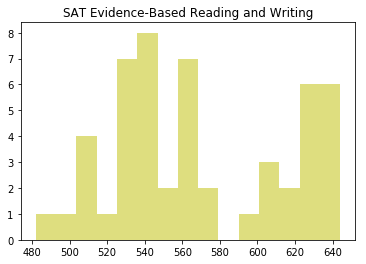

In [64]:
plt.title('ACT English')
plt.hist(act_clean['English'], bins = 15, alpha = 0.5, color = 'b');
plt.show()
plt.title('SAT Evidence-Based Reading and Writing')
plt.hist(sat_clean['Evidence-Based Reading and Writing'] , bins = 15, alpha = 0.5, color = 'y');
plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That data have a normal distribution

##### 20. Does this assumption hold true for any of our columns? Which?

No, none of the column looks that has a normal distribution

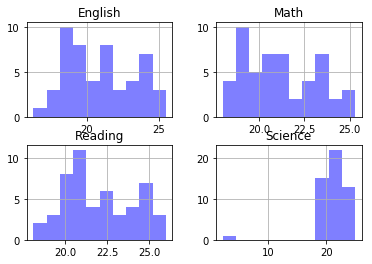

In [66]:
act_clean.hist(alpha = 0.5, color = 'b');

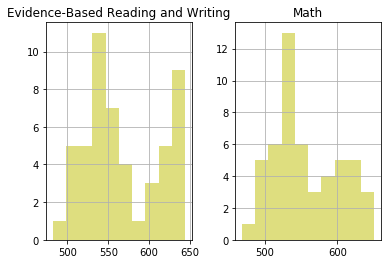

In [67]:
sat_clean.hist(alpha = 0.5, color = 'y');

##### 21. Plot some scatterplots examining relationships between all variables.

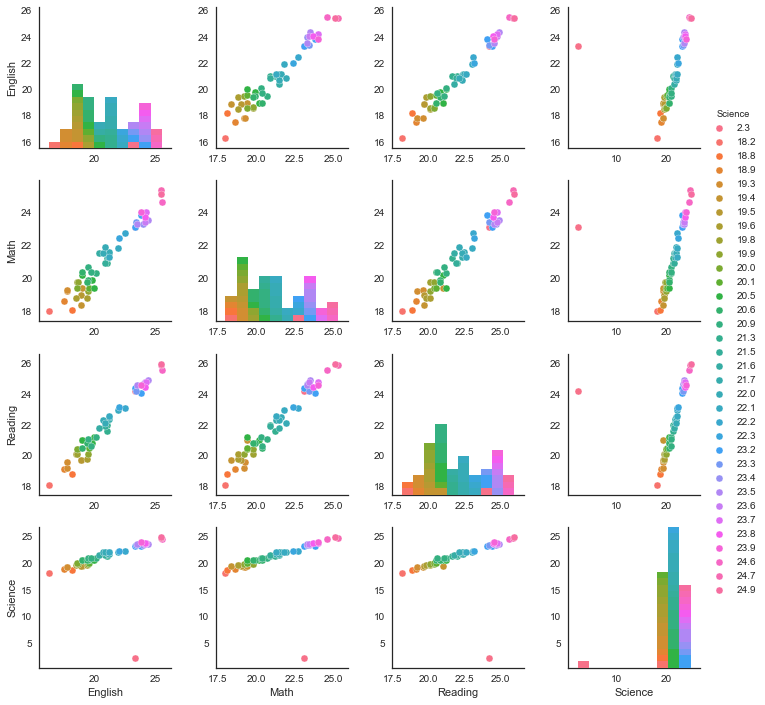

In [95]:
import seaborn as sns; sns.set(style="white", color_codes=True)
sns.pairplot(act_clean, hue = "Science") ;

In [84]:
act_clean.corr()

,English,Math,Reading,Science
English,1.000000,0.967803,0.985999,0.403456
Math,0.967803,1.000000,0.979630,0.412318
Reading,0.985999,0.979630,1.000000,0.401097
Science,0.403456,0.412318,0.401097,1.000000


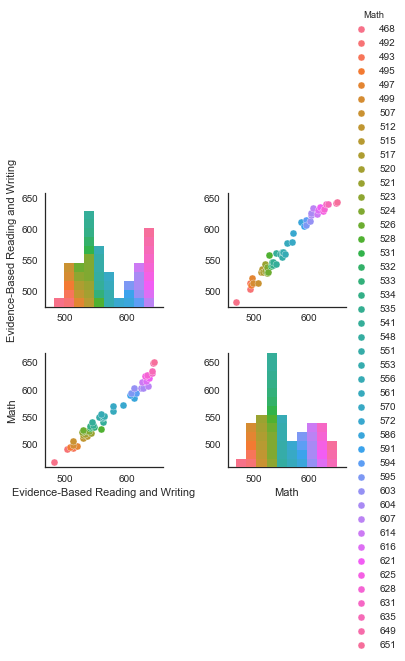

In [93]:
sns.pairplot(sat_clean, hue = "Math");

In [96]:
sat_clean.corr()

,Evidence-Based Reading and Writing,Math
Evidence-Based Reading and Writing,1.000000,0.987056
Math,0.987056,1.000000


##### 22. Are there any interesting relationships to note?

Science has a lower correlation than any other variables

##### 23. Create box plots for each variable. 

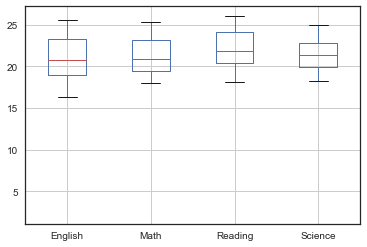

In [97]:
act_clean.boxplot();

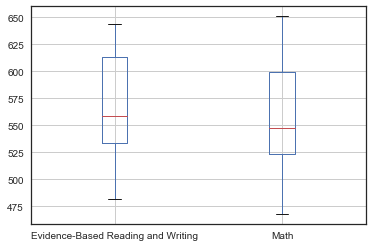

In [98]:
sat_clean.boxplot();

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [122]:
act_sat.head(1)

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165


In [124]:
act_sat_clean = act_sat.drop(['Composite'], axis = 1)
act_sat_clean = act_sat_clean.drop(['Total'], axis = 1)
act_sat_clean

,State,Participation_act,English,Math_act,Reading,Science,Participation_sat,Evidence-Based Reading and Writing,Math_sat
0,Alabama,100.0,18.9,18.4,19.7,19.4,5.0,593,572
1,Alaska,65.0,18.7,19.8,20.4,19.9,38.0,547,533
2,Arizona,62.0,18.6,19.8,20.1,19.8,30.0,563,553
3,Arkansas,100.0,18.9,19.0,19.7,19.5,3.0,614,594
4,California,31.0,22.5,22.7,23.1,22.2,53.0,531,524
5,Colorado,100.0,20.1,20.3,21.2,20.9,11.0,606,595
6,Connecticut,31.0,25.5,24.6,25.6,24.6,100.0,530,512
7,Delaware,18.0,24.1,23.4,24.8,23.6,100.0,503,492
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,100.0,482,468
9,Florida,73.0,19.0,19.4,21.0,19.4,83.0,520,497


In [125]:
act_sat_clean.to_csv('output.csv')

In [128]:
act_sat_clean_corr = act_sat_clean.drop(['State'], axis = 1)
act_sat_clean_corr = act_sat_clean_corr.drop(['Participation_act'], axis = 1)
act_sat_clean_corr = act_sat_clean_corr.drop(['Participation_sat'], axis = 1)
act_sat_clean_corr = act_sat_clean_corr.corr()

In [129]:
act_sat_clean_corr.to_csv('correlation.csv')

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

Central Tendency: mean, median
Spread: std, variance
Shape: kurtosis, Normal? Skewed?

In [104]:
# ACT English
print('Mean: ', act_clean['English'].mean())
print('Median: ', act_clean['English'].median())
print('St Dev: ', act_clean['English'].std())
print('Variance: ', act_clean['English'].var())
print('Skew: ', act_clean['English'].skew())
print('Kurtosis: ', act_clean['English'].kurt())

Mean:  20.931372549019606
Median:  20.7
St Dev:  2.35367713980303
Variance:  5.539796078431372
Skew:  0.352660463487
Kurtosis:  -0.879307429314


In [105]:
# ACT Math
print('Mean: ', act_clean['Math'].mean())
print('Median: ', act_clean['Math'].median())
print('St Dev: ', act_clean['Math'].std())
print('Variance: ', act_clean['Math'].var())
print('Skew: ', act_clean['Math'].skew())
print('Kurtosis: ', act_clean['Math'].kurt())

Mean:  21.182352941176468
Median:  20.9
St Dev:  1.9819894936505533
Variance:  3.928282352941177
Skew:  0.332683294922
Kurtosis:  -0.979209705365


In [106]:
# ACT Reading
print('Mean: ', act_clean['Reading'].mean())
print('Median: ', act_clean['Reading'].median())
print('St Dev: ', act_clean['Reading'].std())
print('Variance: ', act_clean['Reading'].var())
print('Skew: ', act_clean['Reading'].skew())
print('Kurtosis: ', act_clean['Reading'].kurt())

Mean:  22.013725490196077
Median:  21.8
St Dev:  2.0672706264873146
Variance:  4.2736078431372535
Skew:  0.269366079693
Kurtosis:  -0.982093637611


In [107]:
# ACT Science
print('Mean: ', act_clean['Science'].mean())
print('Median: ', act_clean['Science'].median())
print('St Dev: ', act_clean['Science'].std())
print('Variance: ', act_clean['Science'].var())
print('Skew: ', act_clean['Science'].skew())
print('Kurtosis: ', act_clean['Science'].kurt())

Mean:  21.041176470588237
Median:  21.3
St Dev:  3.182462975155452
Variance:  10.12807058823529
Skew:  -4.09953435881
Kurtosis:  24.1800845083


In [110]:
# SAT Evidence-Based Reading and Writing
print('Mean: ', sat_clean['Evidence-Based Reading and Writing'].mean())
print('Median: ', sat_clean['Evidence-Based Reading and Writing'].median())
print('St Dev: ', sat_clean['Evidence-Based Reading and Writing'].std())
print('Variance: ', sat_clean['Evidence-Based Reading and Writing'].var())
print('Skew: ', sat_clean['Evidence-Based Reading and Writing'].skew())
print('Kurtosis: ', sat_clean['Evidence-Based Reading and Writing'].kurt())

Mean:  569.1176470588235
Median:  559.0
St Dev:  45.66690138768932
Variance:  2085.465882352941
Skew:  0.272693431444
Kurtosis:  -1.2203713616


In [108]:
# SAT Math
print('Mean: ', sat_clean['Math'].mean())
print('Median: ', sat_clean['Math'].median())
print('St Dev: ', sat_clean['Math'].std())
print('Variance: ',sat_clean['Math'].var())
print('Skew: ', sat_clean['Math'].skew())
print('Kurtosis: ', sat_clean['Math'].kurt())

Mean:  556.8823529411765
Median:  548.0
St Dev:  47.12139516560329
Variance:  2220.425882352941
Skew:  0.365040276735
Kurtosis:  -0.925843429026


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [111]:
act_clean.corr()

,English,Math,Reading,Science
English,1.000000,0.967803,0.985999,0.403456
Math,0.967803,1.000000,0.979630,0.412318
Reading,0.985999,0.979630,1.000000,0.401097
Science,0.403456,0.412318,0.401097,1.000000


In [112]:
sat_clean.corr()

,Evidence-Based Reading and Writing,Math
Evidence-Based Reading and Writing,1.000000,0.987056
Math,0.987056,1.000000


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [ ]:
H0: mu_part_act  = mu_part_sat
HA: mu_part_act != mu_part_sat   

In [70]:
stats.ttest_ind(act['Participation'], sat['Participation'] )

Ttest_indResult(statistic=3.8085778908170544, pvalue=0.00024134203698662353)

#Interpretation
alpha = 0.05
p-value=0.00024

Because p-value is less than our alpha
We can reject our null hypothesis and conclude that our alternative hypothesis is indeed correct, 
that means that the mean of participation rate of ACT and SAT are not the same.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [113]:
data = act['Participation']
stats.t.interval(0.95, len(data)-1, loc = np.mean(data), scale = np.std(data, ddof=1)/np.sqrt(len(data)))

(56.215144484968086, 74.29465943660054)

In [114]:
np.mean(data)

65.25490196078431

#Interpretation ACT
We are 95% confident that the true mean of participation rate in ACT test is between 56.2 and 74.3

In [115]:
data = sat['Participation']
stats.t.interval(0.95, len(data)-1, loc = np.mean(data), scale = np.std(data, ddof=1)/np.sqrt(len(data)))

(29.882208872773198, 49.725634264481705)

In [116]:
np.mean(data)

39.80392156862745

#Interpretation SAT
We are 95% confident that the true mean of participation rate in SAT test is between 29.88 and 49.7

In [117]:
#standard error
np.std(data, ddof=1)/np.sqrt(len(data))

4.9397165599279065

In [118]:
#standard error - checking
data.sem()

4.9397165599279065

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

Not surprising because I was expecting see both text get different intevals

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

ACT Math and SAT MATH Scores dont have a high correlation

In [132]:
act_sat_clean_corr.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,English,Math_act,Reading,Science,Evidence-Based Reading and Writing,Math_sat
English,1.0,1.0,1.0,0.61,-0.99,-0.99
Math_act,1.0,1.0,1.0,0.62,-0.99,-0.99
Reading,1.0,1.0,1.0,0.62,-0.99,-0.99
Science,0.61,0.62,0.62,1.0,-0.72,-0.72
Evidence-Based Reading and Writing,-0.99,-0.99,-0.99,-0.72,1.0,1.0
Math_sat,-0.99,-0.99,-0.99,-0.72,1.0,1.0


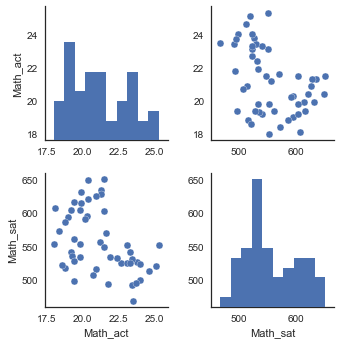

In [131]:
math = act_sat[['Math_act', 'Math_sat']]
sns.pairplot(math);

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Doesnt make sense to conduct statistical inference since the data is not a sample, is the population.

Inferential statistics focuses on generalizing results from a sample to a larger population of interest.
The population is assumed to be larger than the observed data set; in other words, the observed data is assumed to be sampled from a larger population.
Inferential statistics can be contrasted with descriptive statistics. Descriptive statistics is solely concerned with properties of the observed data, and does not assume that the data came from a larger population.